In [1]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

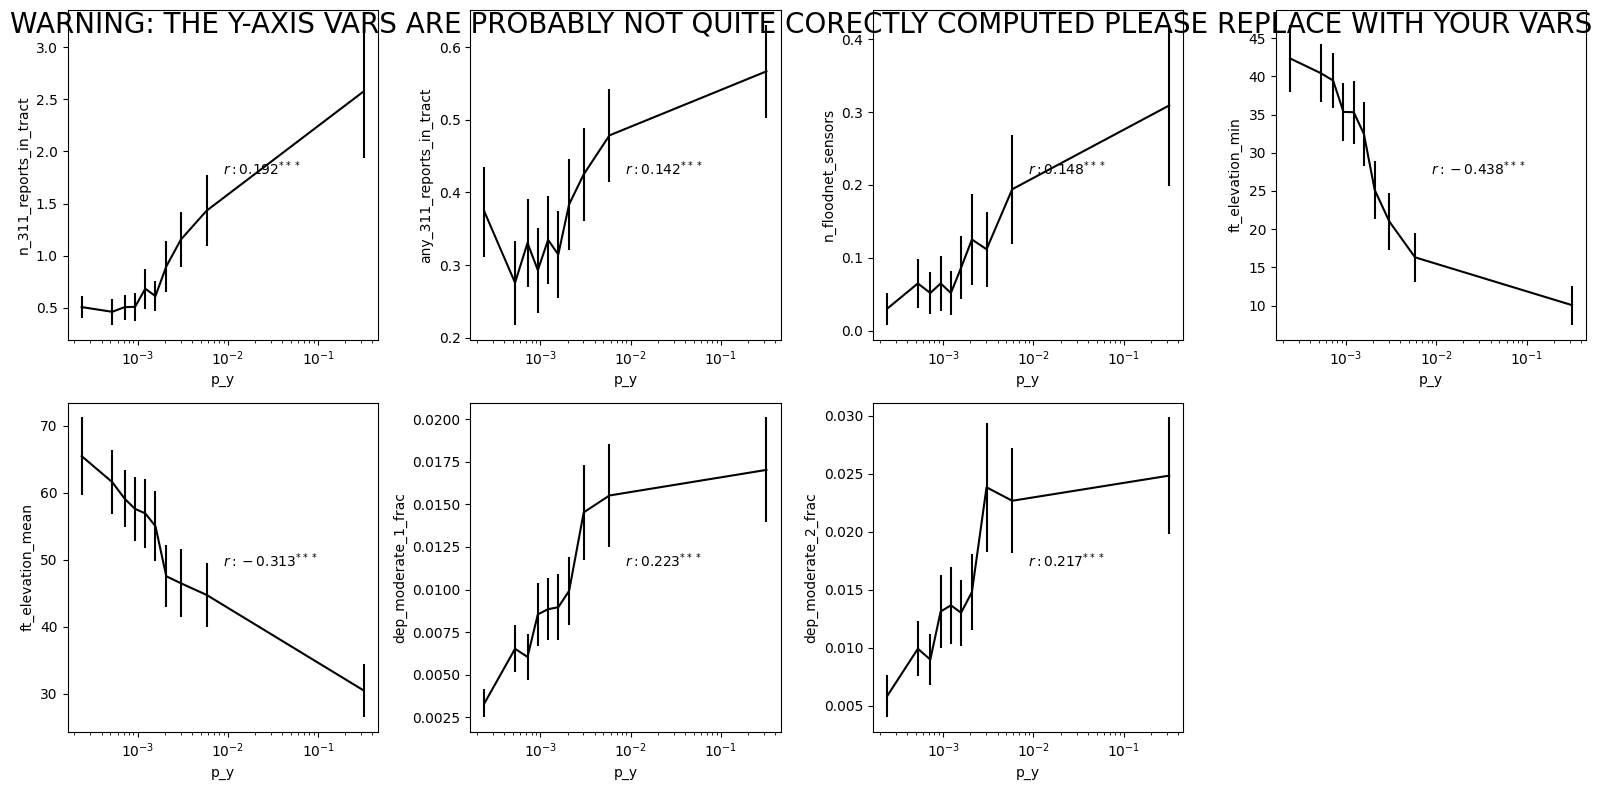

In [48]:
d = pd.read_csv('analysis_df_FEB5_FINAL_PRE_KDD_MODEL_02052025.csv')
d['n_311_reports_in_tract'] = (d['sewer_backup_311c'] + 
                                 d['street_flooding_311c'] + 
                                 d['catch_basin_clogged/flooding_311c'] + 
                                 d['manhole_overflow_311c'] + 
                                 d['highway_flooding_311c'])
assert d['n_311_reports_in_tract'].isnull().sum() == 0
d['any_311_reports_in_tract'] = (d['n_311_reports_in_tract'] > 0) * 1.

d = d[['p_y', 'n_311_reports_in_tract', 'any_311_reports_in_tract', 'n_floodnet_sensors', 
       'ft_elevation_min', 'ft_elevation_mean', 'dep_moderate_1_frac', 'dep_moderate_2_frac']]
d['p_y_bin'], bins = pd.qcut(d['p_y'], 10, labels=False, retbins=True)
bin_centers = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]
assert d['p_y_bin'].isnull().sum() == 0

plot_num = 0
plt.figure(figsize=[16, 8])
for k in d.columns:
    if 'p_y' not in k:
        plot_num += 1
        plt.subplot(2, 4, plot_num)
        means_by_bin = d.groupby('p_y_bin')[k].mean()
        stds_by_bin = d.groupby('p_y_bin')[k].std()
        bin_sizes = d.groupby('p_y_bin').size()
        plt.errorbar(bin_centers, means_by_bin, yerr=1.96 * stds_by_bin / (bin_sizes**0.5), color='black')
        plt.xscale('log')
        plt.xlabel('p_y')
        plt.ylabel(k)
        # add a label with spearman correlation
        spearman_r, spearman_p = spearmanr(d[k], d['p_y'])
        spearman_star = ''
        if spearman_p < 0.05:
            spearman_star = '^{*}'
        if spearman_p < 0.01:
            spearman_star = '^{**}'
        if spearman_p < 0.001:
            spearman_star = '^{***}'
        # add text in a little legend box with spearman r and star
        plt.text(0.5, 0.5, 
                 "$r: %2.3f%s$" % (spearman_r, spearman_star),
                 transform=plt.gca().transAxes,
                 fontsize=10)

        
plt.tight_layout()
plt.suptitle("WARNING: THE Y-AXIS VARS ARE PROBABLY NOT QUITE CORECTLY COMPUTED PLEASE REPLACE WITH YOUR VARS", 
             fontsize=20)
# space properly plots
plt.show()